In [98]:
import pandas as pd
import numpy as np

In [99]:
# Step 1 : Loading the dataset.
dataset_df = pd.read_csv('C:/Users/meher/Downloads/dataset.csv')
dataset_df.head(10)

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
5,5,116,74,0,0,25.6,0.201,0
6,3,78,50,32,88,31,0.248,1
7,10,115,0,0,0,35.3,0.134,0
8,2,197,70,45,543,30.5,0.158,1
9,8,125,96,0,0,0,0.232,1


In [100]:
# discarding rows which contain letters.
columns_containing_letters = ['f1','f2','f4','f5','f6','f7']

for val in columns_containing_letters:
    dataset_df = dataset_df[dataset_df[val].str.isalpha() == False]

In [101]:
dataset_df.shape

(760, 8)

In [102]:
dataset_df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target'], dtype='object')

In [103]:
# Step 2 : Preprocessing the Dataset
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      760 non-null    object
 1   f2      760 non-null    object
 2   f3      760 non-null    int64 
 3   f4      760 non-null    object
 4   f5      760 non-null    object
 5   f6      760 non-null    object
 6   f7      760 non-null    object
 7   target  760 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 53.4+ KB


In [104]:
#Converting all the categorical(object) values to numerical.
    
#list of all categorical columns
categorical_columns = dataset_df.select_dtypes(include=['object']).columns.tolist()
#print(categorical_columns)
for column in categorical_columns:
    dataset_df[column] = dataset_df[column].astype(float)

print(dataset_df.head(10))

     f1     f2  f3    f4     f5    f6     f7  target
0   6.0  148.0  72  35.0    0.0  33.6  0.627       1
1   1.0   85.0  66  29.0    0.0  26.6  0.351       0
2   8.0  183.0  64   0.0    0.0  23.3  0.672       1
3   1.0   89.0  66  23.0   94.0  28.1  0.167       0
4   0.0  137.0  40  35.0  168.0  43.1  2.288       1
5   5.0  116.0  74   0.0    0.0  25.6  0.201       0
6   3.0   78.0  50  32.0   88.0  31.0  0.248       1
7  10.0  115.0   0   0.0    0.0  35.3  0.134       0
8   2.0  197.0  70  45.0  543.0  30.5  0.158       1
9   8.0  125.0  96   0.0    0.0   0.0  0.232       1


In [105]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      760 non-null    float64
 1   f2      760 non-null    float64
 2   f3      760 non-null    int64  
 3   f4      760 non-null    float64
 4   f5      760 non-null    float64
 5   f6      760 non-null    float64
 6   f7      760 non-null    float64
 7   target  760 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 53.4 KB


In [106]:
# checking if there are null values in the dataset
null_values = dataset_df.isnull().sum()
null_values

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [107]:
# normalization of dataset using min max value.
normalized_cols = ['f1',  'f2',  'f3',  'f4',  'f5',  'f6',  'f7']

for val in normalized_cols:
    max_val_col = dataset_df[val].max()
    min_val_col = dataset_df[val].min()
    dataset_df[val] = (dataset_df[val] - min_val_col) / (max_val_col - min_val_col)

In [108]:
# Scaling numerical variables to have mean as 0 and unit variance as 1.

Y_target = dataset_df['target']
X_data = dataset_df.drop('target', axis=1)
print(X_data)
print(Y_target)

           f1        f2        f3        f4        f5        f6        f7
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638
..        ...       ...       ...       ...       ...       ...       ...
755  0.058824  0.643216  0.721311  0.393939  0.130024  0.543964  0.418019
756  0.411765  0.688442  0.737705  0.414141  0.000000  0.476900  0.133646
757  0.000000  0.618090  0.590164  0.000000  0.000000  0.540984  0.076857
758  0.058824  0.532663  0.622951  0.000000  0.000000  0.558867  0.050811
759  0.352941  0.954774  0.754098  0.000000  0.000000  0.529061  0.085397

[760 rows x 7 columns]
0      1
1      0
2      1
3      0
4      1
      ..
755    1
756    0
757    1
758    

<AxesSubplot: >

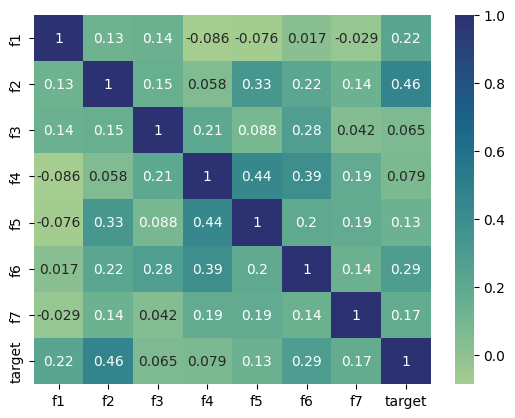

In [109]:
import seaborn as sns
import pandas as pd

corr = dataset_df.corr()

sns.heatmap(corr, annot=True, cmap='crest')

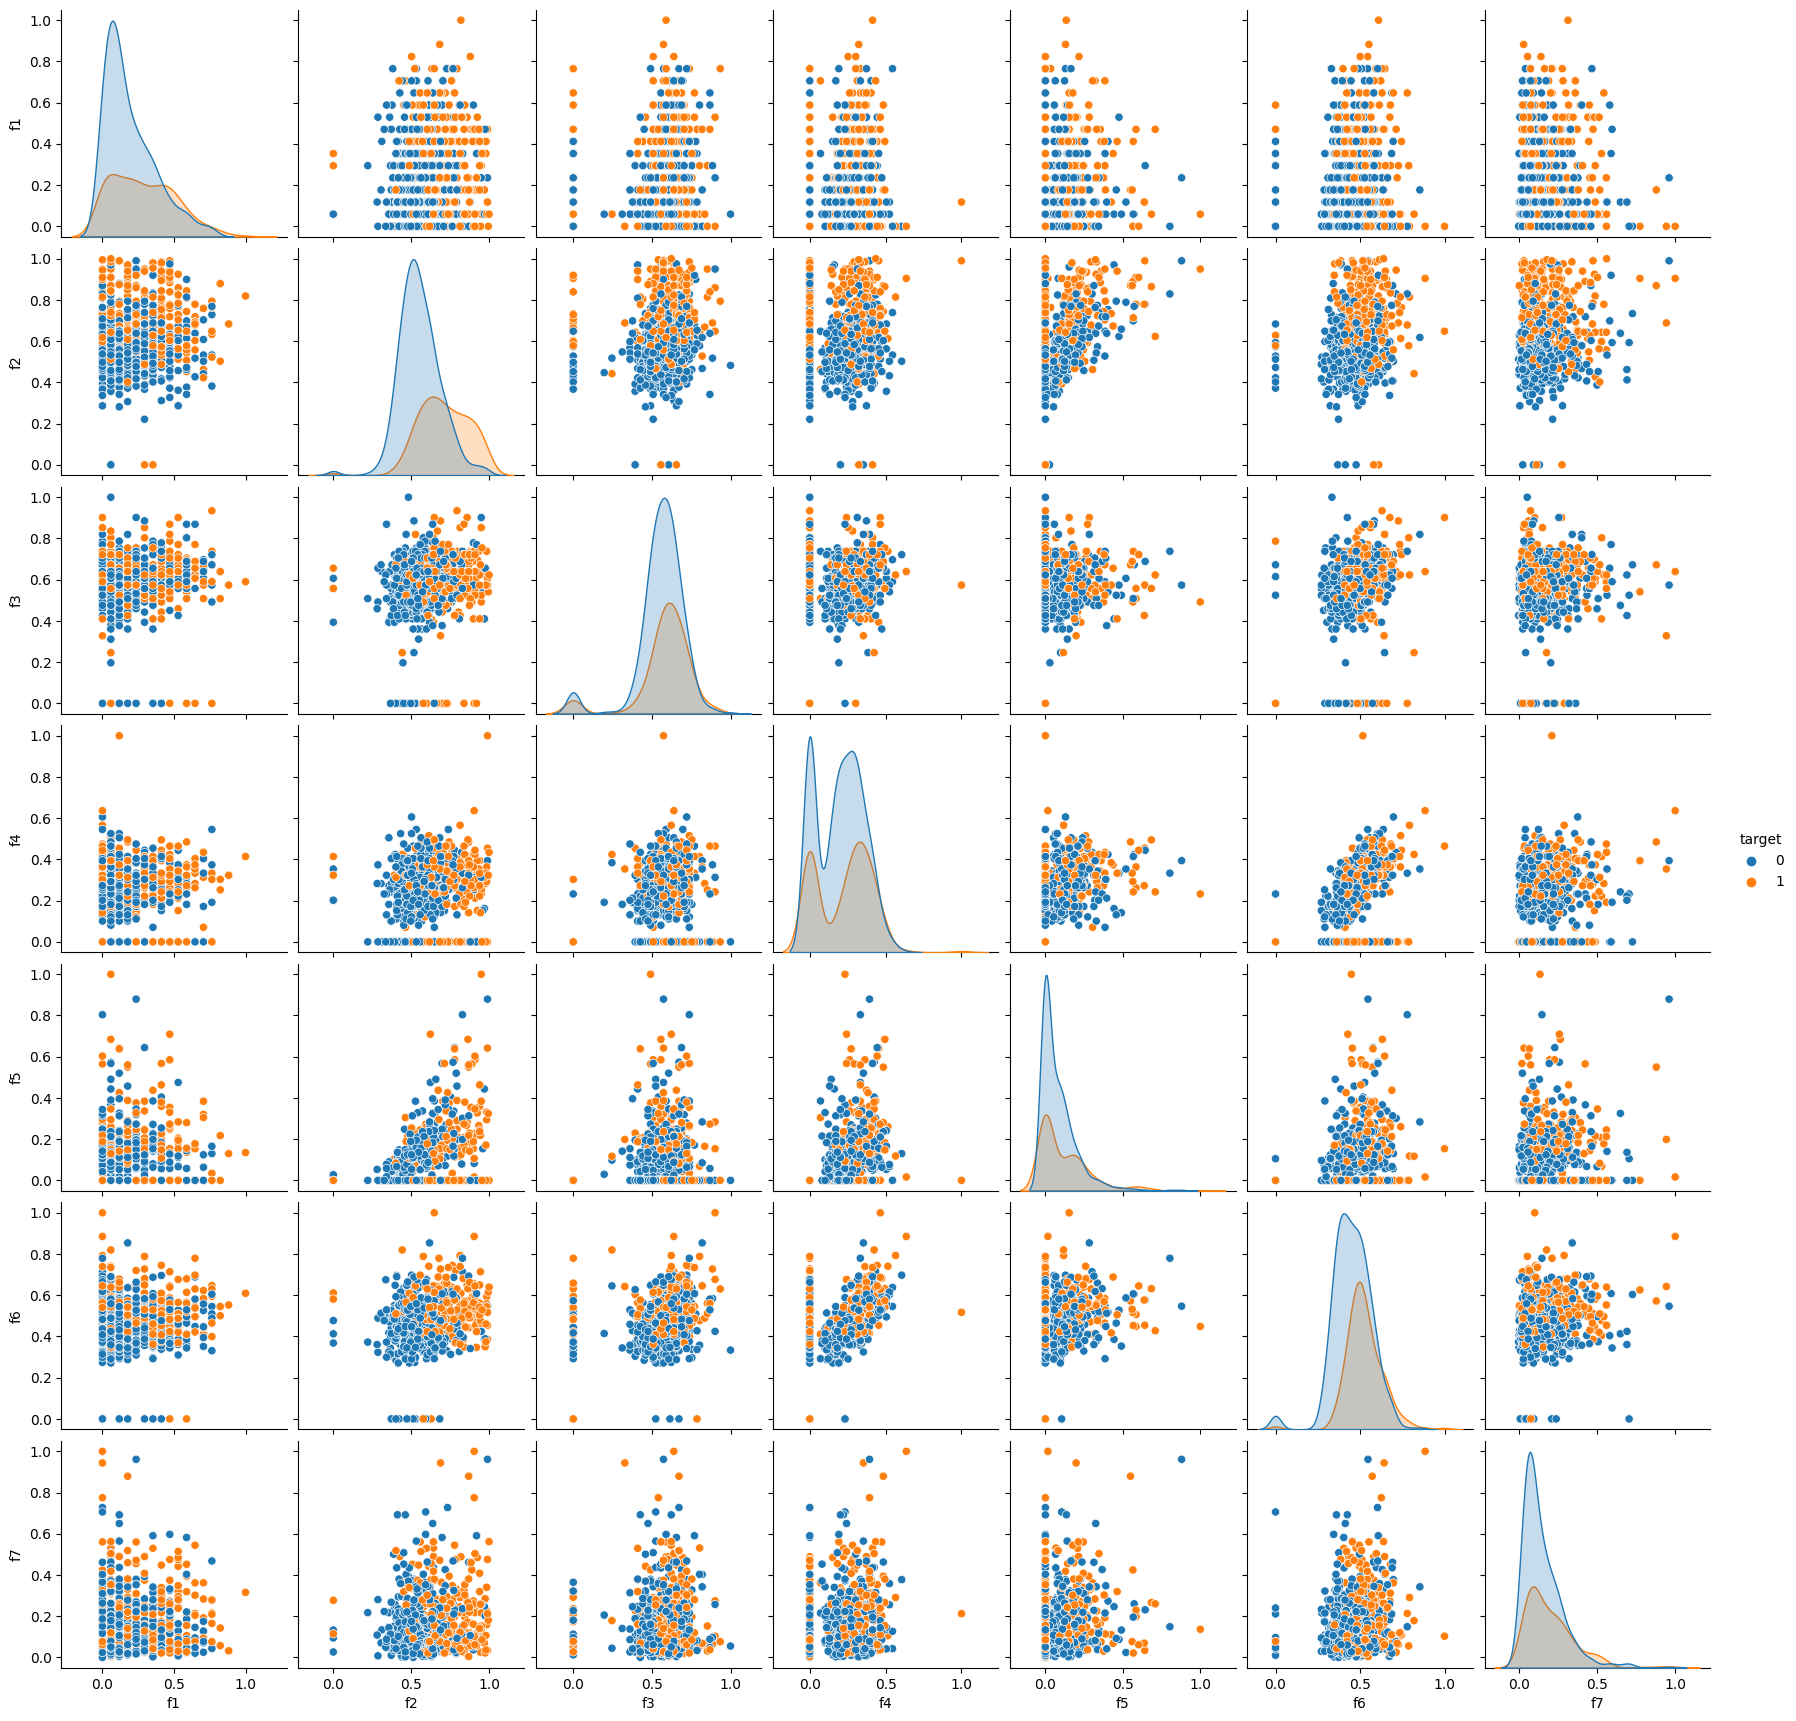

In [110]:
sns.pairplot(dataset_df, hue='target')

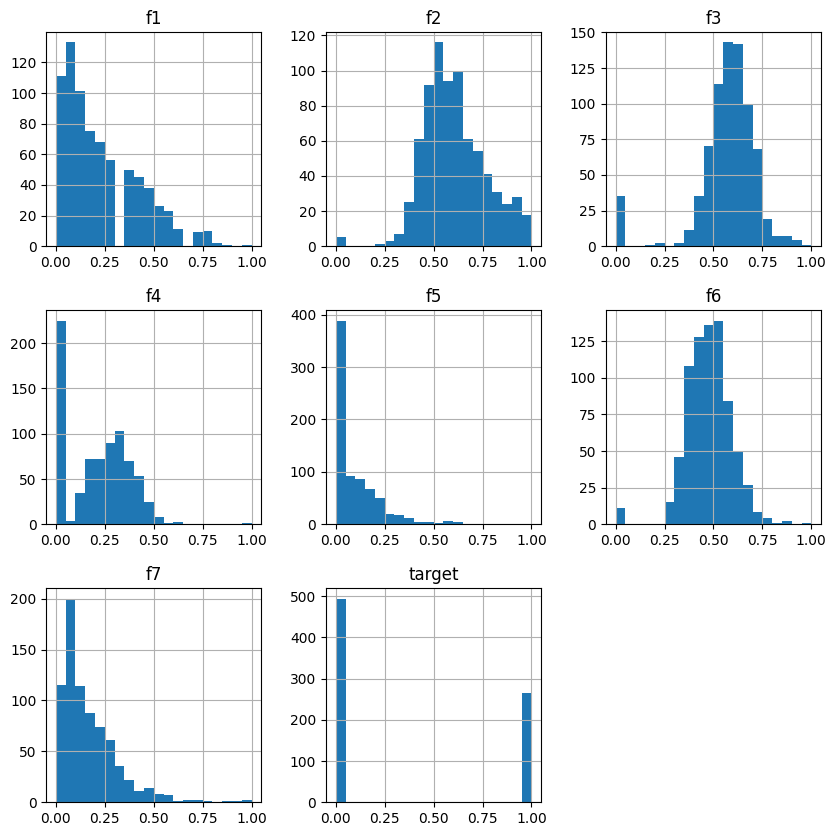

In [111]:
import matplotlib.pyplot as plt

dataset_df.hist(bins=20, figsize=(10,10))
plt.show()

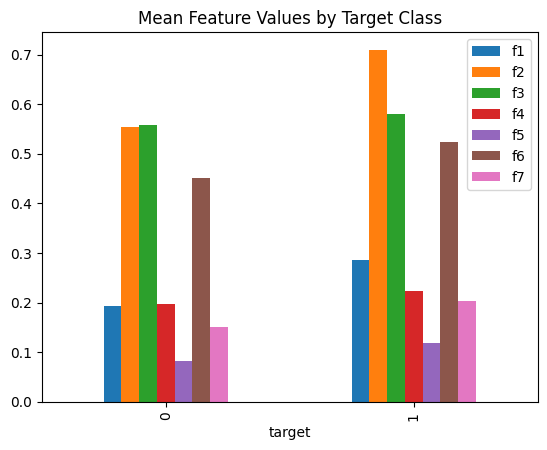

In [112]:
means = dataset_df.groupby('target').mean()

# Create a bar chart of the mean values for each feature
means.plot(kind='bar')
plt.title('Mean Feature Values by Target Class')
plt.show()

In [68]:
#Dividing the dataset into training and test, as 80% training, 20% testing dataset.
from sklearn.model_selection import train_test_split

X_training, X_testing,y_training, y_testing = train_test_split(X_data, Y_target,random_state=40, test_size=0.2)

print("X_train:",X_training.shape)
print("Y_train:",y_training.shape)
print("X_train:",X_testing.shape)
print("Y_test:",y_testing.shape)

X_train: (608, 7)
Y_train: (608,)
X_train: (152, 7)
Y_test: (152,)


In [69]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [71]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [72]:
X_training_tensor = torch.Tensor(X_training.values)
X_testing_tensor = torch.Tensor(X_testing.values)
y_training_tensor = torch.Tensor(y_training.values)
y_testing_tensor = torch.Tensor(y_testing.values)

In [73]:
print(X_training_tensor)
print(X_testing_tensor)
print(y_training_tensor)
print(y_testing_tensor)

tensor([[0.0588, 0.3568, 0.5082,  ..., 0.0000, 0.3249, 0.1443],
        [0.4118, 0.9095, 0.6885,  ..., 0.2270, 0.5350, 0.2169],
        [0.0588, 0.4472, 0.6230,  ..., 0.0437, 0.4650, 0.0487],
        ...,
        [0.5882, 0.5779, 0.0000,  ..., 0.0000, 0.5261, 0.0239],
        [0.2941, 0.5628, 0.5410,  ..., 0.0000, 0.5633, 0.0781],
        [0.0588, 0.6131, 0.5246,  ..., 0.1844, 0.5231, 0.2622]])
tensor([[0.0000, 0.4724, 0.5738,  ..., 0.1359, 0.6483, 0.1149],
        [0.2353, 0.6281, 0.5738,  ..., 0.1442, 0.4307, 0.4552],
        [0.4706, 0.5477, 0.6230,  ..., 0.1348, 0.4158, 0.2400],
        ...,
        [0.1765, 0.6533, 0.6393,  ..., 0.0934, 0.4232, 0.1046],
        [0.0000, 0.5126, 0.6148,  ..., 0.0000, 0.0000, 0.2109],
        [0.2353, 0.6633, 0.0000,  ..., 0.0000, 0.4903, 0.0956]])
tensor([0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 

#### Step 3: Defining my Neural Network

1)How many input neurons are there?
Ans:- the input neurons to the neural network is a 7.

2)What activation function will you choose?
Ans:- the activation function used in the hidden layers of the neural network is ReLU (Rectified Linear Unit).

3)What is the number of hidden layers?
Ans:- there are two hidden layers in the neural network.

4)What is the size of each hidden layer?
Ans:- both the hidden layers has 64 and 128 neurons respectively.

5)What activation function is used for the hidden and output layer?
Ans:- ReLU activation function is used for the hidden layers (first and second linear layers), and sigmoid activation function is used for the output layer (third linear layer).


In [74]:
# Define the neural network model
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"
#print(f"Using {device} device")



class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

# Instantiate the model
model = NeuralNetwork().to(device)
with torch.no_grad():
    # Get the model's predictions on the test set
    logits = model(X_training_tensor)
    pred_probab = nn.Softmax(dim=1)(logits)
    y_pred = pred_probab.argmax(1)
    accuracy = (y_pred == y_training_tensor).float().mean()
print(f"Accuracy for Training: {accuracy:.4f}")

with torch.no_grad():
    # Get the model's predictions on the test set
    logits = model(X_testing_tensor)
    pred_probab = nn.Softmax(dim=1)(logits)
    y_pred = pred_probab.argmax(1)
    accuracy = (y_pred == y_testing_tensor).float().mean()

print(f"Accuracy for Testing: {accuracy:.4f}")

Accuracy for Training: 0.6612
Accuracy for Testing: 0.6053


In [75]:
# Declaring Criterion and Optimizer
from torch.utils.data import TensorDataset
criterion = nn.BCEWithLogitsLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
 
# Training with Validation
min_valid_loss = np.inf
trainloss = []
validloss = [] 


num_epochs = 10
batch_size = 32

train_dataset = TensorDataset(X_training_tensor, y_training_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_testing_tensor, y_testing_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNetwork()


for count in range(num_epochs):
    train_loss = 0.0
    for data, labels in train_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target.squeeze(), labels.float())
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
    trainloss.append(train_loss / len(train_loader))
    print(f'Epoch {count+1}  :- Training Loss: {train_loss / len(train_loader)}')

Epoch 1  :- Training Loss: 0.7091132998466492
Epoch 2  :- Training Loss: 0.7091133029837358
Epoch 3  :- Training Loss: 0.7091133123949954
Epoch 4  :- Training Loss: 0.7091132998466492
Epoch 5  :- Training Loss: 0.7091133218062552
Epoch 6  :- Training Loss: 0.709113315532082
Epoch 7  :- Training Loss: 0.7091132904353895
Epoch 8  :- Training Loss: 0.7091133061208224
Epoch 9  :- Training Loss: 0.7091132967095626
Epoch 10  :- Training Loss: 0.7091133029837358


In [76]:
for count in range(num_epochs):
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    test_predictions = []
    test_targets = []
    for data, labels in test_loader:
        data, labels = data, labels
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target.squeeze(), labels.float())
        # Calculate Loss
        valid_loss += loss.item()
        predictions = torch.round(target.squeeze())
        test_predictions.extend(predictions.tolist())
        test_targets.extend(labels.tolist())
    validloss.append(valid_loss / len(test_loader))
    print(f'Epoch {count+1}  :- Validation Loss: {valid_loss / len(test_loader)}')

Epoch 1  :- Validation Loss: 0.7036215662956238
Epoch 2  :- Validation Loss: 0.704221785068512
Epoch 3  :- Validation Loss: 0.7036245703697205
Epoch 4  :- Validation Loss: 0.7045839309692383
Epoch 5  :- Validation Loss: 0.7038163065910339
Epoch 6  :- Validation Loss: 0.7042015194892883
Epoch 7  :- Validation Loss: 0.7038123965263366
Epoch 8  :- Validation Loss: 0.7040268898010253
Epoch 9  :- Validation Loss: 0.703627347946167
Epoch 10  :- Validation Loss: 0.7040072560310364


In [77]:
import torch
from sklearn.metrics import confusion_matrix
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss(reduction='mean')
accur_test = []
accur_train = []
num_epochs =50
batch_size=32
for epoch in range(num_epochs):
    for i in range(0, len(X_training_tensor), batch_size):
        batch_features = X_training_tensor[i:i+batch_size]
        batch_labels = y_training_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        outputs_train = model(X_training_tensor)
        predicted_train = torch.round(torch.sigmoid(outputs_train))
        correct_train = (predicted_train == y_training_tensor.unsqueeze(1)).sum().item()
        total_train = y_training_tensor.size(0)
        accur_train.append(correct_train / total_train * 100)

    with torch.no_grad():
        outputs = model(X_testing_tensor)
        predicted = torch.round(torch.sigmoid(outputs))
        correct = (predicted == y_testing_tensor.unsqueeze(1)).sum().item()
        total = y_testing_tensor.size(0)
        accur_test.append(correct / total * 100)
print('Accuracy for training: {:.2f}%'.format(correct_train / total_train * 100))
print('Accuracy for testing: {:.2f}%'.format(correct / total * 100)) 
    
with torch.no_grad():
    outputs = model(X_testing_tensor)
    predicted = torch.round(torch.sigmoid(outputs))
    y_pred = predicted.cpu().numpy().flatten()
    y_true = y_testing_tensor.cpu().numpy().flatten()
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', cm)

Accuracy for training: 79.93%
Accuracy for testing: 76.32%
Confusion matrix:
 [[80 12]
 [24 36]]


In [78]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "part1.pt")

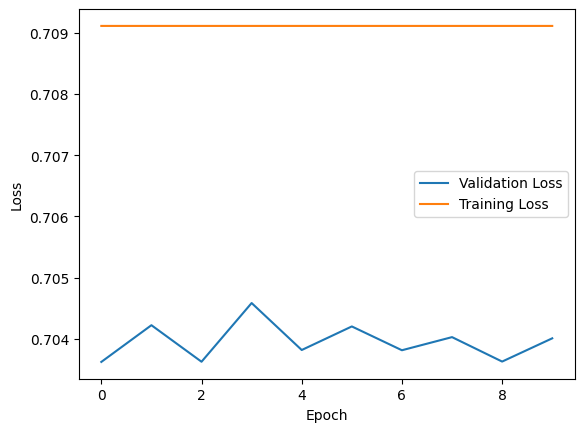

In [79]:
# Visualize the results of validation loss
import matplotlib.pyplot as plt
plt.plot(validloss, label="Validation Loss")
plt.plot(trainloss, label="Training Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

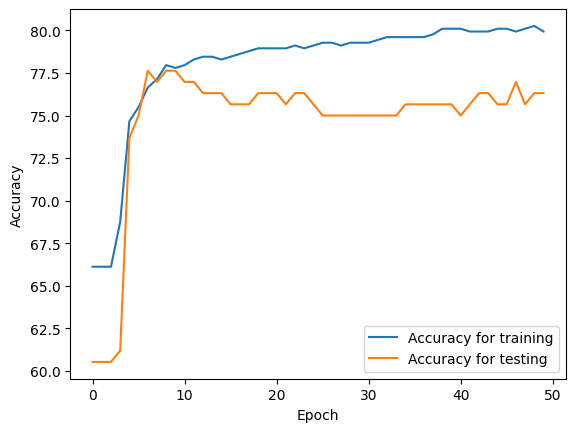

In [80]:
# Visualize the results of accuracy.

plt.plot(accur_train, label="Accuracy for training")
plt.plot(accur_test, label="Accuracy for testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

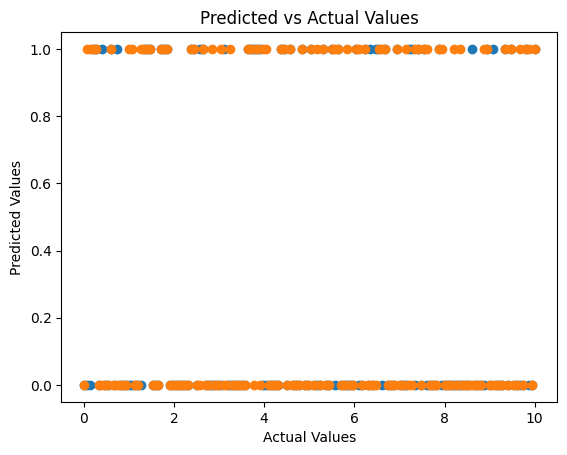

In [81]:
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 152)
# create the scatter plot
plt.scatter(x, y_pred)
plt.scatter(x, y_true)


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

# display the plot
plt.show()

In [82]:
pip install torchbearer

##### Part II - Optimizing NN

In [83]:
# changing hyperparamaters one at a time for setup 1,2,3 to find the best accuracy.

class NeuralNetwork1(nn.Module):
    def __init__(self, dropout_rate=0.27):
        super().__init__()
        self.linear_relu_dropout_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(64, 128),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, 64),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(64, 1),
            #nn.tanh(),
            #nn.ReLU(),
        )

    def forward(self, x):
        logits = self.linear_relu_dropout_stack(x)
        return logits

In [84]:
import torch
from sklearn.metrics import confusion_matrix

model1 = NeuralNetwork1()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0123)
criterion = nn.BCEWithLogitsLoss(reduction='mean')
accur_test = []
accur_train = []
num_epochs =50
batch_size=32
for epoch in range(num_epochs):
    for i in range(0, len(X_training_tensor), batch_size):
        batch_features = X_training_tensor[i:i+batch_size]
        batch_labels = y_training_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model1(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        outputs_train = model1(X_training_tensor)
        #predicted_train = nn.Softmax(dim=1)(outputs_train)
        predicted_train = torch.round(torch.sigmoid(outputs_train))
        correct_train = (predicted_train == y_training_tensor.unsqueeze(1)).sum().item()
        total_train = y_training_tensor.size(0)
        accur_train.append(correct_train / total_train * 100)

    with torch.no_grad():
        outputs = model1(X_testing_tensor)
        #predicted = nn.Softmax(dim=1)(outputs)
        predicted = torch.round(torch.sigmoid(outputs))
        correct = (predicted == y_testing_tensor.unsqueeze(1)).sum().item()
        total = y_testing_tensor.size(0)
        accur_test.append(correct / total * 100)
print('Accuracy for training: {:.2f}%'.format(correct_train / total_train * 100))
print('Accuracy for testing: {:.2f}%'.format(correct / total * 100)) 

Accuracy for training: 76.32%
Accuracy for testing: 66.45%


In [85]:
# Saving the weights of the new trained neural network
torch.save(model1.state_dict(), "part2.pt")

#### So the best setup we got from 12 use case was:-
- 1)Optimizer - optim.Adam
- 2)Initializer - 0.001
- 3)Activation function - sigmoid
- 4)Dropout - 0.27


In [86]:
#first method that we will implement to increase the accuracy of the model is K-fold method.

import torch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


# where k = 6
kf = KFold(n_splits=6)

# create lists to store accuracies for each fold
accur_test_kfold = []
accur_train_kfold = []

# loop over the k folds
for train_index, test_index in kf.split(X_training_tensor):
    # split the data into training and testing sets
    X_train, X_test = X_training_tensor[train_index], X_training_tensor[test_index]
    y_train, y_test = y_training_tensor[train_index], y_training_tensor[test_index]

    # initialize the model, optimizer, and loss function
    model1 = NeuralNetwork1()
    optimizer = torch.optim.Adam(model1.parameters(), lr=0.0123)
    criterion = nn.BCEWithLogitsLoss(reduction='mean')

    # train the model for a specified number of epochs
    num_epochs = 50
    batch_size = 32
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            batch_features = X_train[i:i+batch_size]
            batch_labels = y_train[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model1(batch_features)
            loss = criterion(outputs, batch_labels.unsqueeze(1))
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            outputs_train = model1(X_train)
            predicted_train = torch.round(torch.sigmoid(outputs_train))
            correct_train = (predicted_train == y_train.unsqueeze(1)).sum().item()
            total_train = y_train.size(0)
            accur_train_kfold.append(correct_train / total_train * 100)

        with torch.no_grad():
            outputs = model1(X_test)
            predicted = torch.round(torch.sigmoid(outputs))
            correct = (predicted == y_test.unsqueeze(1)).sum().item()
            total = y_test.size(0)
            accur_test_kfold.append(correct / total * 100)

# calculate and print the average accuracies over all folds
avg_train_accuracy = sum(accur_train_kfold) / len(accur_train_kfold)
avg_test_accuracy = sum(accur_test_kfold) / len(accur_test_kfold)
print('Average accuracy for training: {:.2f}%'.format(avg_train_accuracy))
print('Average accuracy for testing: {:.2f}%'.format(avg_test_accuracy))

# So while implementing kfolds with k as 6 we got the highest testing accuracy as 73.25% adn training accuracy as 76.11%

Average accuracy for training: 76.11%
Average accuracy for testing: 73.25%


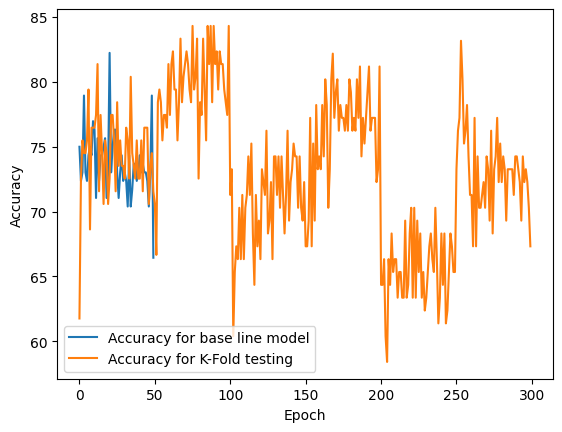

In [87]:
# Visualize the results of accuracy.

plt.plot(accur_test, label="Accuracy for base line model")
plt.plot(accur_test_kfold, label="Accuracy for K-Fold testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

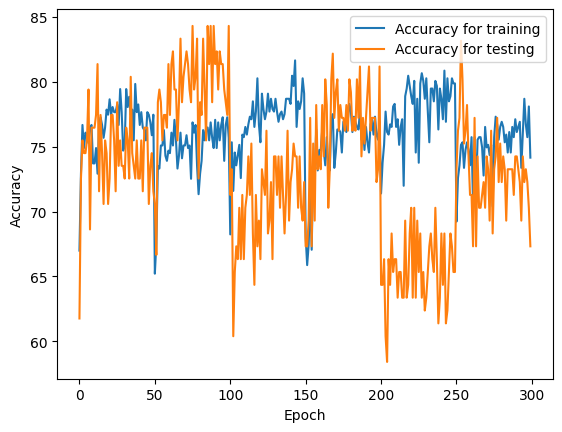

In [88]:
# Visualize the results of accuracy.

plt.plot(accur_train_kfold, label="Accuracy for training")
plt.plot(accur_test_kfold, label="Accuracy for testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [89]:
# Second method is to implement Early stopping on our base model.

import torch
import numpy as np
from sklearn.metrics import confusion_matrix

model1 = NeuralNetwork1()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0123)
criterion = nn.BCEWithLogitsLoss(reduction='mean')


trainval_dataset = torch.utils.data.TensorDataset(X_training_tensor, y_training_tensor)

# Define data loaders for training and validation sets
batch_size = 32
trainval_loader = torch.utils.data.DataLoader(trainval_dataset, batch_size=batch_size, shuffle=True)

# Set up early stopping
best_loss = np.inf
patience = 10 
counter = 0  

# Train the model
num_epochs = 100
accur_test_earlystop = []
accur_train_earlystop = []
for epoch in range(num_epochs):
    for batch_features, batch_labels in trainval_loader:
        optimizer.zero_grad()
        outputs = model1(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        outputs_train = model1(X_training_tensor)
        predicted_train = torch.round(torch.sigmoid(outputs_train))
        correct_train = (predicted_train == y_training_tensor.unsqueeze(1)).sum().item()
        total_train = y_training_tensor.size(0)
        accur_train_earlystop.append(correct_train / total_train * 100)

        outputs_val = model1(X_testing_tensor)
        loss_val = criterion(outputs_val, y_testing_tensor.unsqueeze(1))
        if loss_val < best_loss:
            best_loss = loss_val
            counter = 0
            best_model = model1.state_dict()
        else:
            counter += 1
        if counter >= patience:
            # Stop training if there is no improvement for subsequent epochs
            print(f"Stopping early after {epoch} epochs")
            break
        predicted_val = torch.round(torch.sigmoid(outputs_val))
        correct_val = (predicted_val == y_testing_tensor.unsqueeze(1)).sum().item()
        total_val = y_testing_tensor.size(0)
        accur_test_earlystop.append(correct_val / total_val * 100)

    if counter >= patience:
        break  

model1.load_state_dict(best_model)
with torch.no_grad():
    outputs_test = model1(X_testing_tensor)
    predicted_test = torch.round(torch.sigmoid(outputs_test))
    correct_test = (predicted_test == y_testing_tensor.unsqueeze(1)).sum().item()
    total_test = y_testing_tensor.size(0)
    print('Accuracy for Testing: {:.2f}%'.format(correct_test / total_test * 100))
    
#So here we can see that there was an early stoppage at 17 epoch and we got a better accuracy on the testing set as : 78.29%

Stopping early after 17 epochs
Accuracy for Testing: 78.29%


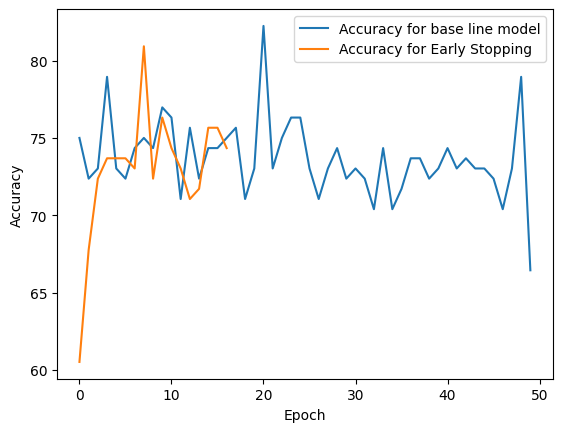

In [90]:
# Visualize the results of accuracy.

plt.plot(accur_test, label="Accuracy for base line model")
plt.plot(accur_test_earlystop, label="Accuracy for Early Stopping")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

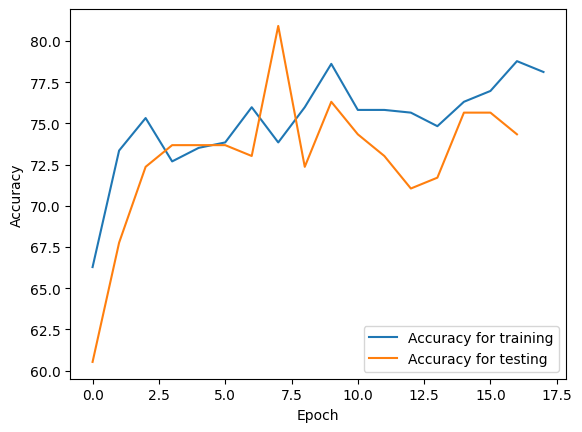

In [91]:
# Visualize the results of accuracy.

plt.plot(accur_train_earlystop, label="Accuracy for training")
plt.plot(accur_test_earlystop, label="Accuracy for testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [92]:
# third method that we are implementing on our neural network to increase its accuracy is learning rate scheduler.

model1 = NeuralNetwork1()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0123)
criterion = nn.BCEWithLogitsLoss(reduction='mean')
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
accur_test_LRS = []
accur_train_LRS = []
num_epochs = 100
batch_size = 32
best_test_val = 0
for epoch in range(num_epochs):
    for i in range(0, len(X_training_tensor), batch_size):
        batch_features = X_training_tensor[i:i+batch_size]
        batch_labels = y_training_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model1(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        outputs_train = model1(X_training_tensor)
        predicted_train = torch.round(torch.sigmoid(outputs_train))
        correct_train = (predicted_train == y_training_tensor.unsqueeze(1)).sum().item()
        total_train = y_training_tensor.size(0)
        accur_train_LRS.append(correct_train / total_train * 100)
    with torch.no_grad():
        outputs = model1(X_testing_tensor)
        predicted = torch.round(torch.sigmoid(outputs))
        correct = (predicted == y_testing_tensor.unsqueeze(1)).sum().item()
        total = y_testing_tensor.size(0)
        accur_test_LRS.append(correct / total * 100)
    scheduler.step()
    if best_test_val < accur_test_LRS[-1]:
        best_test_val = accur_test_LRS[-1]
    if best_test_val == accur_test_LRS[-1]:
        print('Epoch: {}, LRS: {}, Training Accuracy: {:.2f}%, Testing Accuracy: {:.2f}%'.format(epoch+1, scheduler.get_last_lr(), accur_train_LRS[-1], accur_test_LRS[-1]))

# As we can see the test accuracy is maximum during 26th epoch which is 80.26% where the learning rate was 1.2300000000000005e-06.

Epoch: 1, LRS: [0.0123], Training Accuracy: 69.41%, Testing Accuracy: 62.50%
Epoch: 2, LRS: [0.0123], Training Accuracy: 72.53%, Testing Accuracy: 71.05%
Epoch: 3, LRS: [0.0123], Training Accuracy: 76.48%, Testing Accuracy: 77.63%
Epoch: 16, LRS: [0.0012300000000000002], Training Accuracy: 77.47%, Testing Accuracy: 77.63%
Epoch: 26, LRS: [0.00012300000000000004], Training Accuracy: 75.99%, Testing Accuracy: 80.26%


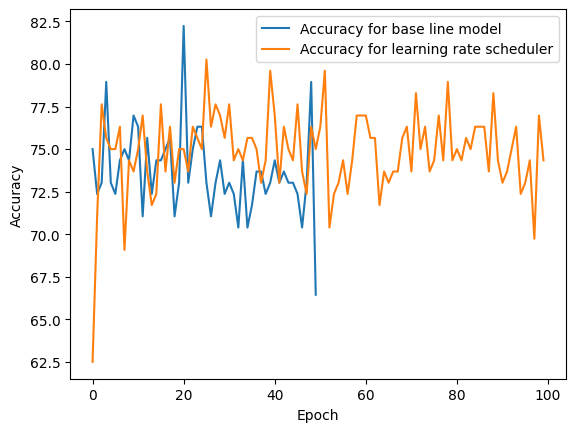

In [93]:
# Visualize the results of accuracy.
plt.plot(accur_test, label="Accuracy for base line model")
plt.plot(accur_test_LRS, label="Accuracy for learning rate scheduler")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

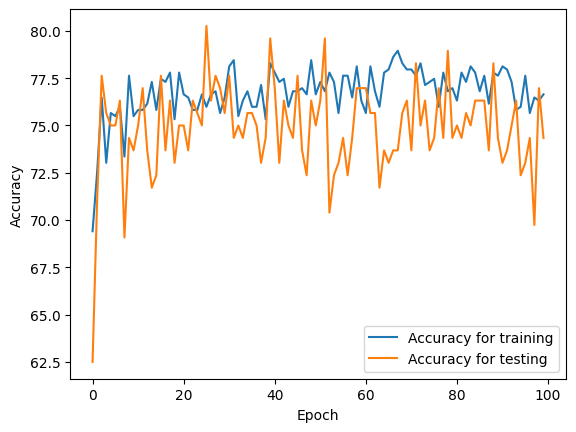

In [94]:
# Visualize the results of accuracy.

plt.plot(accur_train_LRS, label="Accuracy for training")
plt.plot(accur_test_LRS, label="Accuracy for testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [95]:
# fourth method that we will implement is batch normalization


import torch
from torch import nn
from sklearn.metrics import confusion_matrix

class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_rate=0.27):
        super().__init__()
        self.linear_relu_dropout_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.tanh(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(64, 1),
            #nn.tanh(),
            #nn.ReLU(),
        )

    def forward(self, x):
        logits = self.linear_relu_dropout_stack(x)
        return logits


model2 = NeuralNetwork2()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.0123)
criterion = nn.BCEWithLogitsLoss(reduction='mean')
accur_test_BN = []
accur_train_BN = []
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_training_tensor), batch_size):
        batch_features = X_training_tensor[i:i+batch_size]
        batch_labels = y_training_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model2(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        model2.eval()
        outputs_train = model2(X_training_tensor)
        predicted_train = torch.round(torch.sigmoid(outputs_train))
        correct_train = (predicted_train == y_training_tensor.unsqueeze(1)).sum().item()
        total_train = y_training_tensor.size(0)
        accur_train_BN.append(correct_train / total_train * 100)
        model2.train()

    with torch.no_grad():
        model2.eval()
        outputs = model2(X_testing_tensor)
        predicted = torch.round(torch.sigmoid(outputs))
        correct = (predicted == y_testing_tensor.unsqueeze(1)).sum().item()
        total = y_testing_tensor.size(0)
        accur_test_BN.append(correct / total * 100)
        model2.train()

print('Accuracy for training: {:.2f}%'.format(correct_train / total_train * 100))
print('Accuracy for testing: {:.2f}%'.format(correct / total * 100))


# We got the training accuracy as 82.07% and testing accuracy as 75.00% using batch normalization.

Accuracy for training: 82.07%
Accuracy for testing: 75.00%


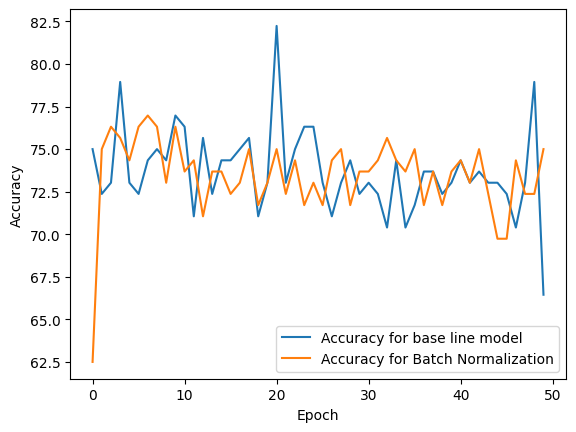

In [96]:
# Visualize the results of accuracy.
plt.plot(accur_test, label="Accuracy for base line model")
plt.plot(accur_test_BN, label="Accuracy for Batch Normalization")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

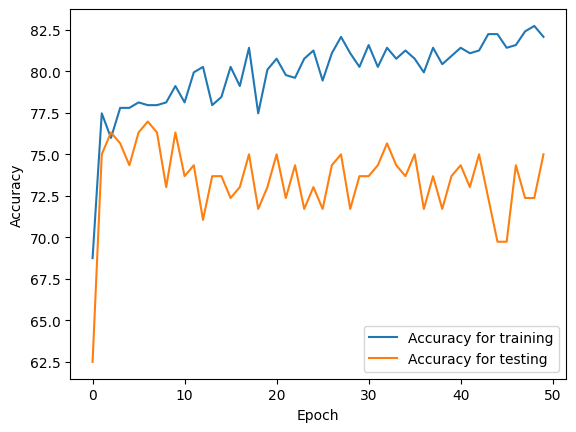

In [97]:
# Visualize the results of accuracy.

plt.plot(accur_train_BN, label="Accuracy for training")
plt.plot(accur_test_BN, label="Accuracy for testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [35]:
#So the best accuracy for the testing set that we got was with the help of learning rate scheduler (80.26%).